In [114]:
import pandas as pd
from matplotlib import pyplot as plt, patches
from mplsoccer import Pitch, VerticalPitch
import numpy as np
# Read the time of the goal from events.csv
events_df = pd.read_csv("data/events.csv")
# goal = events_df[events_df.event=='goal']
goal=events_df[events_df.event_id==8269]
goal_run_time_in_ms = goal.match_run_time_in_ms

raw_df = pd.read_csv("data/tracking.csv")
def secondsToFrames(seconds):
    return int(seconds * 25)


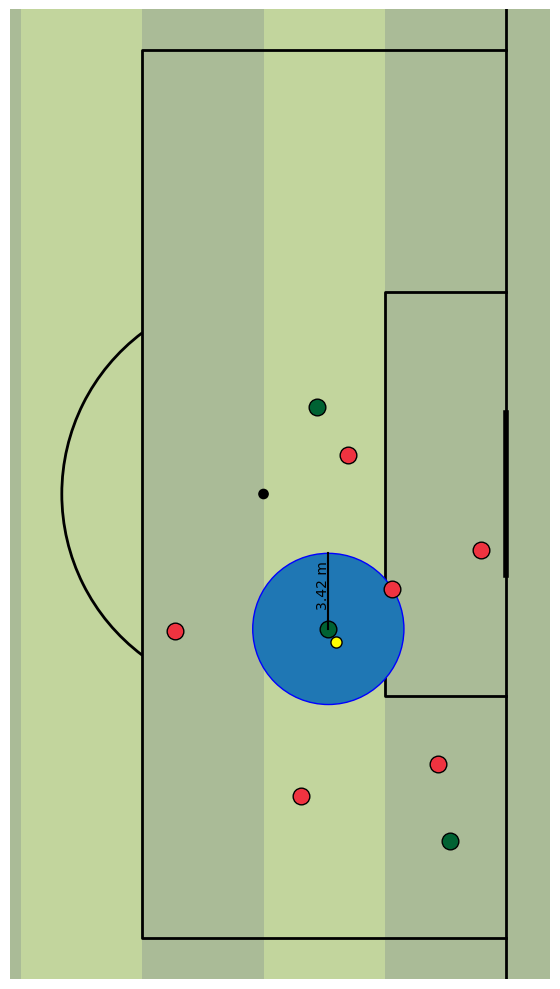

In [121]:

# Transform the time of the goal to the frame of the goal
goal_frame = 1440350 + int(goal_run_time_in_ms/1000*25)
# Choose the start and end frames of the time window to animate
start_frame = goal_frame - 400
end_frame = goal_frame + 50

# Object ids
ball_id = -1
home_team_id = 43935 # team_id of Belgium
away_team_id = 43872 # team_id of Morocco
ref_id = 3

# Select the subset
# df = raw_df[(raw_df.frame>=start_frame) & (raw_df.frame<=end_frame)]
df=raw_df[raw_df.frame==goal_frame]

df_ball = df[df.team_id==ball_id]
df_home = df[df.team_id==home_team_id]
df_away = df[df.team_id==away_team_id]
df_refs = df[df.team_id==ref_id]

# print(df_ball)

#-----------------------------------------------------------------
scorer=df_away[df_away.player_jersey_number==14.0]
scorer= scorer[['x', 'y']].dropna(axis=0)
Witsel=df_home[df_home.player_jersey_number==6.]
Witsel=Witsel[['x', 'y']].dropna(axis=0)
x_coord= (4444-4734)
y_coord= (-612 +429)
abstand=np.sqrt(x_coord**2 +y_coord**2)

circle1 = patches.Circle((4444, -612), radius=abstand, edgecolor='blue')
#-----------------------------------------------------------------


# First set up the figure, the axis
pitch = Pitch(half=True, pitch_type='tracab', goal_type='line', pitch_width=68, pitch_length=105, pitch_color='#aabb97', stripe=True, stripe_color='#c2d59d', line_color='black', axis=False, label=False,
              pad_left=-30,  # Extend the left axis 5 data units
              pad_right=2,  # Extend the right axis 5 data units
              pad_top=-12,  # Extend the top axis 5 data units
              pad_bottom=-12) # Extend the bottom axis 5 data units
fig, ax = pitch.draw(figsize=(15, 10))

# Setup the pitch plot markers we want to animate
marker_kwargs = {'marker': 'o', 'markeredgecolor': 'black', 'linestyle': 'None'}
ax.add_patch(circle1)
ball, = ax.plot([], [], ms=8, markerfacecolor='yellow', zorder=3, **marker_kwargs)
away, = ax.plot([], [], ms=12, markerfacecolor='#006233', **marker_kwargs)  # The away team in red
home, = ax.plot([], [], ms=12, markerfacecolor='#EF3340', **marker_kwargs)  # The home team in blue
rad_strich=ax.plot([4444, 4444], [-612, -612+abstand], color='black')
ax.text(s='3.42 m', x=4444-55, y=-612 + 0.3*abstand, rotation='vertical')

away.set_data(df_away.loc[df_away.frame == goal_frame, 'x'],
                  df_away.loc[df_away.frame == goal_frame, 'y'])
home.set_data(df_home.loc[df_home.frame == goal_frame, 'x'],
                  df_home.loc[df_home.frame == goal_frame, 'y'])
ball.set_data(df_ball.iloc[0, 3], df_ball.iloc[0, 4])

plt.savefig('2-0_shot.png', dpi=300, bbox_inches='tight', pad_inches=0)






